In [1]:
from keras.models import Model, load_model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from resnet50 import *
from keras.initializers import glorot_uniform
import numpy as np
import h5py
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from keras.utils.data_utils import get_file

y = 2


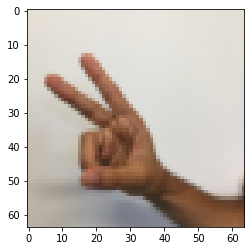

In [2]:
train_dataset = h5py.File('datasign/train_signs.h5', "r")
train_X = np.array(train_dataset["train_set_x"][:]) # your train set features
train_Y = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasign/test_signs.h5', "r")
test_X = np.array(test_dataset["test_set_x"][:]) # your test set features
test_Y = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y = test_Y.reshape((1, test_Y.shape[0]))

index = 6
plt.imshow(train_X[index])
print ("y = " + str(np.squeeze(train_Y[:, index])))

In [3]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

train_Y = convert_to_one_hot(train_Y, 6)
test_Y = convert_to_one_hot(test_Y, 6)

train_X = train_X/255.
test_X = test_X/255.
print('train_X shape = ',train_X.shape)
print('train_Y shape = ',train_Y.shape)
print('test_X shape = ',test_X.shape)
print('test_Y shape = ',test_Y.shape)

train_X shape =  (1080, 64, 64, 3)
train_Y shape =  (1080, 6)
test_X shape =  (120, 64, 64, 3)
test_Y shape =  (120, 6)


In [4]:
model = ResNet50(input_shape = (64, 64, 3), classes = 6)

In [5]:
model = load_model("ResNet50.h5")

In [6]:
preds = model.evaluate(test_X, test_Y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

4/4 [==============================] - 4s 713ms/step - loss: 0.5302 - accuracy: 0.8667
Loss = 0.5301783680915833
Test Accuracy = 0.8666666746139526


y_predict = 5
[[4.7658403e-05 4.3197307e-03 5.1191166e-02 8.8002984e-05 3.9556937e-04
  9.4395787e-01]]


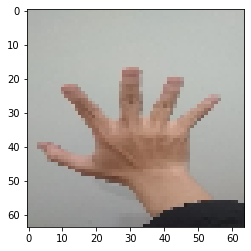

In [7]:
img_path = 'images/five.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x/255.0

y = list(model.predict(x)[0])
print('y_predict =',y.index(max(y)))
print(model.predict(x))